In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

df = pd.read_json('../data/database-10-12.json')

#### Unterteile nach erster, mittlerer und letzter Woche

In [ ]:
# 1. Woche von 18.07.2022 - 24.07.2022
# 0.5. Woche von 05.09.2022 - 11.09.2022
# -1. Woche von 17.10.2022 - 23.10.2022

df_first = df.loc[(df['date'] >= "2022-07-18") & (df['date'] <= "2022-07-24")]
df_middle = df.loc[(df['date'] >= "2022-09-05") & (df['date'] <= "2022-09-11")]
df_last = df.loc[(df['date'] >= "2022-10-17") & (df['date'] <= "2022-10-23")]

#### Füge ein neues Feature hinzu: Themengebiet

In [2]:
topics = json.loads(open("topics.json", "r").read())

df['tags_full'] = ['; '.join(tags) for tags in df['tags'].to_list()]

for topic in topics:
    df.loc[(df.title.str.contains('|'.join(topics[topic]['keywords'])) | df.tags_full.str.contains('|'.join(topics[topic]['keywords']))), 'topic'] = topic

## Balkendiagramm

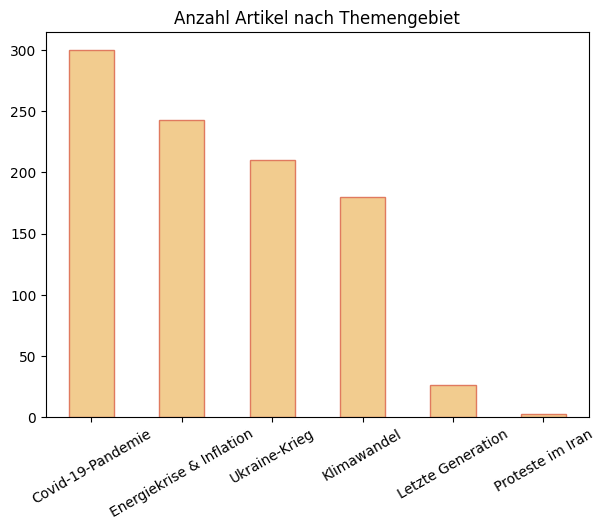

In [5]:
topicsdf = df.topic.value_counts().reset_index(name="amount")

ax = topicsdf.plot(kind="bar", x="index", y="amount", figsize=(7,5), legend=False, rot=30, color="#f2cc8f", edgecolor='#e07a5f', title="Anzahl Artikel nach Themengebiet")
ax.axes.get_xaxis().get_label().set_visible(False)

ax.get_figure().savefig('bar-topic.png', bbox_inches="tight")